<a href="https://colab.research.google.com/github/VedikaJoshi25/Test/blob/main/The%20UK%20Phillips%20Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload CPI CSV


Saving CPALTT01GBM657N.csv to CPALTT01GBM657N (7).csv
Upload Unemployment CSV


Saving LMUNRRTTGBQ156S.csv to LMUNRRTTGBQ156S (6).csv


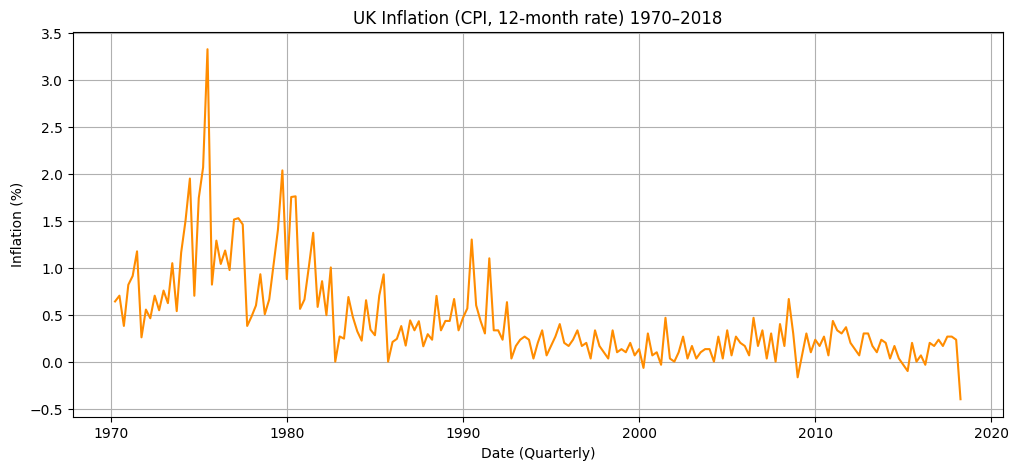

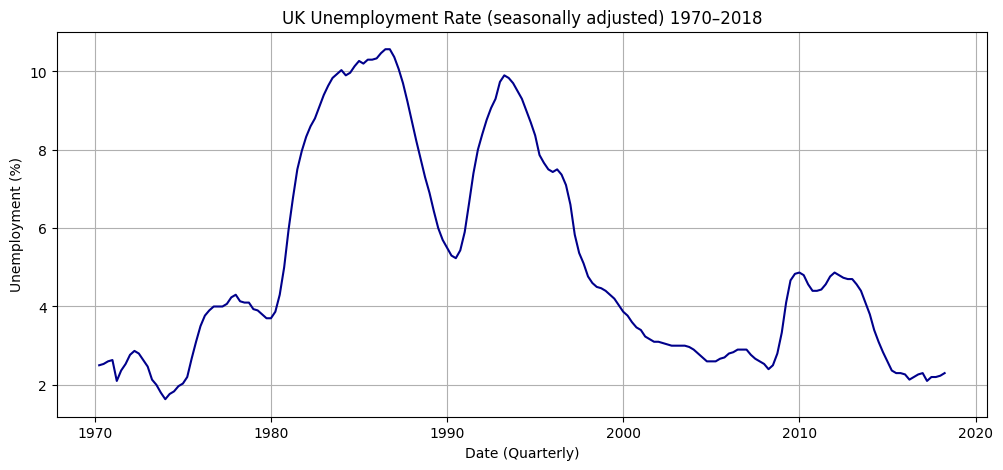

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# --- Upload CPI CSV ---
print("Upload CPI CSV")
uploaded = files.upload()
cpi_file = list(uploaded.keys())[0]
cpi = pd.read_csv(cpi_file)

# --- Upload Unemployment CSV ---
print("Upload Unemployment CSV")
uploaded = files.upload()
unemp_file = list(uploaded.keys())[0]
unemp = pd.read_csv(unemp_file)

# --- Clean and prepare ---
cpi = cpi.rename(columns={cpi.columns[0]: 'date', cpi.columns[1]: 'inflation'})
unemp = unemp.rename(columns={unemp.columns[0]: 'date', unemp.columns[1]: 'unemployment'})

cpi['date'] = pd.to_datetime(cpi['date'])
unemp['date'] = pd.to_datetime(unemp['date'])

cpi = cpi.set_index('date')
unemp = unemp.set_index('date')

# --- Merge and resample quarterly ---
df = cpi.join(unemp, how='outer')
df = df['1970':'2018'].resample('QE-DEC').mean().dropna()

# --- Plot Inflation ---
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['inflation'], color='darkorange')
plt.title('UK Inflation (CPI, 12-month rate) 1970–2018')
plt.xlabel('Date (Quarterly)')
plt.ylabel('Inflation (%)')
plt.grid(True)
plt.show()

# --- Plot Unemployment ---
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['unemployment'], color='darkblue')
plt.title('UK Unemployment Rate (seasonally adjusted) 1970–2018')
plt.xlabel('Date (Quarterly)')
plt.ylabel('Unemployment (%)')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

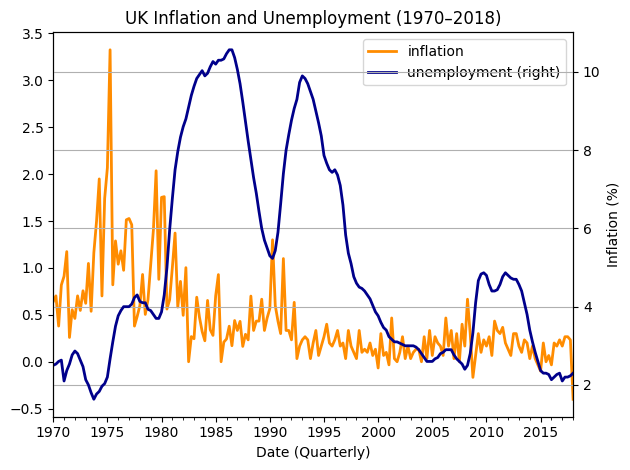

In [12]:

import matplotlib.pyplot as plt

# --- Combined plot using pandas .plot with secondary y-axis ---
plt.figure(figsize=(10, 6))
df.plot(
    y=["inflation", "unemployment"],
    secondary_y="unemployment",
    color=["darkorange", "darkblue"],
    linewidth=2,
    grid=True,
    title="UK Inflation and Unemployment (1970–2018)",
    xlabel="Date (Quarterly)",
    ylabel="Inflation (%)"
)
plt.tight_layout()
plt.show()

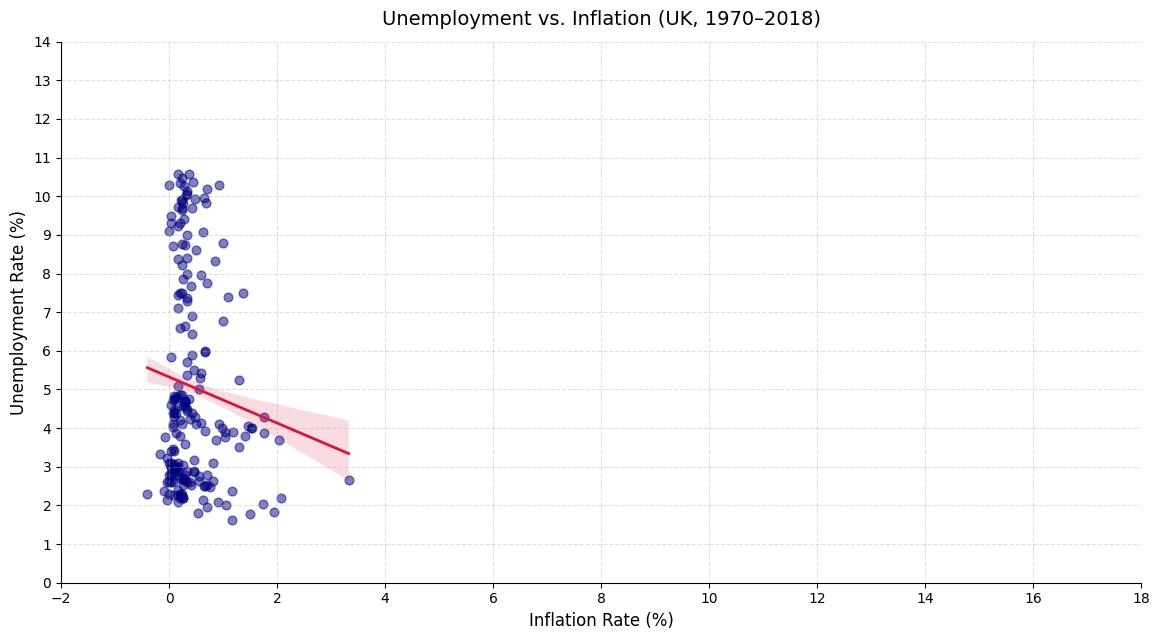

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Scatter plot with fitted line ---
sns.lmplot(
    data=df,
    x="inflation",
    y="unemployment",
    height=6.5,
    aspect=1.8,  # Wider layout: ~11.7 x 6.5 inches
    scatter_kws={"color": "navy", "alpha": 0.5, "s": 40},
    line_kws={"color": "crimson", "linewidth": 2},
    ci=65
)

# --- Labels and title ---
plt.title("Unemployment vs. Inflation (UK, 1970–2018)", fontsize=14, pad=12)
plt.xlabel("Inflation Rate (%)", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)

# --- Ticks and grid ---
plt.xticks(ticks=range(-2, 20, 2), fontsize=10)
plt.yticks(ticks=range(0, 15, 1), fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)

# --- Layout and save ---
plt.tight_layout()
plt.savefig("UK_Unemployment_vs_Inflation.png", dpi=300)
plt.show()

In [17]:
import statsmodels.api as sm

# --- Filter quarterly data for 1990–2018 ---
reg_df = df['1990':'2018'][['inflation', 'unemployment']].dropna()

# --- Define variables ---
X = reg_df['unemployment']
y = reg_df['inflation']

# --- Add constant for intercept α ---
X = sm.add_constant(X)

# --- Run OLS regression ---
model = sm.OLS(y, X).fit()

# --- Print summary ---
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     7.192
Date:                Tue, 30 Sep 2025   Prob (F-statistic):            0.00844
Time:                        14:53:10   Log-Likelihood:                 20.232
No. Observations:                 113   AIC:                            -36.46
Df Residuals:                     111   BIC:                            -31.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0977      0.044      2.232   

In [18]:
import statsmodels.api as sm

# --- Filter and prepare quarterly data ---
reg_df = df['1990':'2018'][['inflation', 'unemployment']].dropna()
reg_df['inflation_lag'] = reg_df['inflation'].shift(1)
reg_df = reg_df.dropna()

# --- Define variables ---
X = reg_df[['inflation_lag', 'unemployment']]
y = reg_df['inflation']
X = sm.add_constant(X)

# --- Run regression ---
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     5.410
Date:                Tue, 30 Sep 2025   Prob (F-statistic):            0.00576
Time:                        15:03:11   Log-Likelihood:                 22.876
No. Observations:                 112   AIC:                            -39.75
Df Residuals:                     109   BIC:                            -31.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0780      0.044      1.772

In [ ]:
#- Inflation persistence (λ̂ = 0.185)
#Inflation shows weak persistence: only ~18.5% of last quarter’s inflation carries over. This suggests expectations may adjust quickly or that other factors dominate short-run inflation dynamics.
#- Unemployment effect (β̂ = +0.018)
# the coefficient is positive and statistically significant: a 1 percentage point increase in unemployment is associated with a 0.018 percentage point increase in annual CPI inflation.
#This contradicts the traditional Phillips Curve and may reflect structural shifts or supply-side pressures in the UK economy during this period.
